In [ ]:
# Installing Required Libraries

'''
pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn
pip install nltk
'''

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/qx816/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
 


In [3]:
tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets.shape

(14640, 15)

In [ ]:
# Exploratory Data Analysis

# To see the number of positive, negative and neutral reviews in the form of a bar plot,



Axes(0.125,0.125;0.775x0.755)


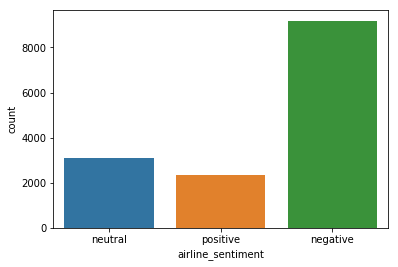

In [6]:
import seaborn as sns
print(sns.countplot(x='airline_sentiment', data=tweets))

In [ ]:
# From the output, you can see that the number of negative reviews is much higher than the number of positive and neutral reviews.


Axes(0.125,0.125;0.775x0.755)


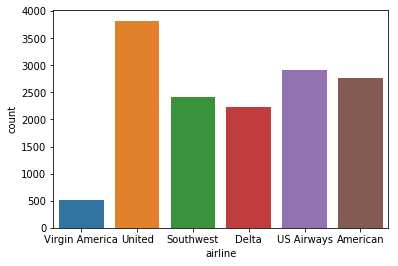

In [7]:
# Similarly, to see which Airline got the highest number of reviews,  execute the following script.

print(sns.countplot(x='airline', data=tweets))


In [ ]:
# From the output, you can see that the “United” Airline got the highest number of reviews whereas “Virgin America” got the lowest number of reviews.

Axes(0.125,0.125;0.775x0.755)


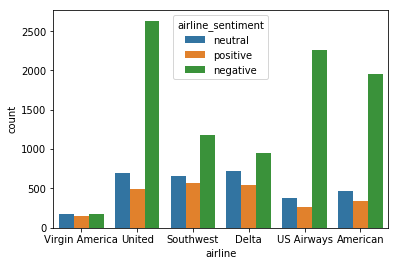

In [8]:
# Finally, let’s see the number of reviews of each type that each Airline received. To do so, you can again use the countplot method from the seaborn library.

print(sns.countplot(x='airline', hue="airline_sentiment", data=tweets))

In [ ]:
# You can see that for almost all the airlines, the number of negative reviews is larger than positive and neutral reviews.

In [9]:
# Data Preprocessing
'''
First, let’s divide our dataset into features and label set. In our feature set, we will only use the text of the tweets as a feature. The corresponding label will be the sentiment of the tweet. The text column is the 10th column (column index starts from 0 in pandas) in the dataset and contains the text of the tweet. Similarly, the “airline_sentiment” is the first column and contains the sentiment. Use the “iloc” method of the pandas dataframe to create our feature set X and the label set y as shown below.
'''

'\nFirst, let’s divide our dataset into features and label set. In our feature set, we will only use the text of the tweets as a feature. The corresponding label will be the sentiment of the tweet. The text column is the 10th column (column index starts from 0 in pandas) in the dataset and contains the text of the tweet. Similarly, the “airline_sentiment” is the first column and contains the sentiment. Use the “iloc” method of the pandas dataframe to create our feature set X and the label set y as shown below.\n'

In [10]:
X = tweets.iloc[:, 10].values  
y = tweets.iloc[:, 1].values

In [11]:
'''
Our dataset contains many special characters and empty spaces. You need to remove them in order to have a clean dataset. The following script does that:
'''

'\nOur dataset contains many special characters and empty spaces. You need to remove them in order to have a clean dataset. The following script does that:\n'

In [12]:
processed_tweets = []

for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))

    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()

    processed_tweets.append(processed_tweet)


In [13]:
'''
Let’s see what is happening in the script above. We are basically using different types of regular expression to perform text preprocessing. The regular expression re.sub(r'\W', ' ', str(X[tweet]))   removes all the special characters from our tweet.
'''

"\nLet’s see what is happening in the script above. We are basically using different types of regular expression to perform text preprocessing. The regular expression re.sub(r'\\W', ' ', str(X[tweet]))   removes all the special characters from our tweet.\n"

In [14]:
'''
When you remove special characters,  you are left with single characters that do not have any meaning. For instance, when you remove the special character from the word “Julia’s”, you are left with “Julia” and “s”. Here “s” has no meaning. The regular expression  re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)  removes all the single characters except the ones at the start. To remove the single characters from the beginning of a sentence, the regex re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)   is used.
'''

"\nWhen you remove special characters,  you are left with single characters that do not have any meaning. For instance, when you remove the special character from the word “Julia’s”, you are left with “Julia” and “s”. Here “s” has no meaning. The regular expression  re.sub(r'\\s+[a-zA-Z]\\s+', ' ', processed_tweet)  removes all the single characters except the ones at the start. To remove the single characters from the beginning of a sentence, the regex re.sub(r'\\^[a-zA-Z]\\s+', ' ', processed_tweet)   is used.\n"

In [15]:
'''
Next, as a result of removing special characters and single spaces, multiple spaces appear in the text. To remove these multiple spaces and replace them by single spaces, use re.sub(r'\s+', ' ', processed_tweet, flags=re.I)  regex.

In some cases, the dataset is in byte format. In such cases, character “b” is appended at the beginning of the string. Remove that leading “b” using the re.sub(r'^b\s+', '', processed_tweet)  regular expression. As the last step, convert your text into lowercase in order to maintain uniformity.
'''

"\nNext, as a result of removing special characters and single spaces, multiple spaces appear in the text. To remove these multiple spaces and replace them by single spaces, use re.sub(r'\\s+', ' ', processed_tweet, flags=re.I)  regex.\n\nIn some cases, the dataset is in byte format. In such cases, character “b” is appended at the beginning of the string. Remove that leading “b” using the re.sub(r'^b\\s+', '', processed_tweet)  regular expression. As the last step, convert your text into lowercase in order to maintain uniformity.\n"

In [ ]:
# TF-IDF Scheme for Text to Numeric Feature Generation


In [16]:
''' Statistical approaches such as machine learning and deep learning work well with numerical data. However, natural language consists of words and sentences. Therefore, before you can build a sentiment analysis model, you need to convert text to numbers. Several approaches have been developed for converting text to numbers. Bag of Words, N-grams, and Word2Vec model are some of them.'''

' Statistical approaches such as machine learning and deep learning work well with numerical data. However, natural language consists of words and sentences. Therefore, before you can build a sentiment analysis model, you need to convert text to numbers. Several approaches have been developed for converting text to numbers. Bag of Words, N-grams, and Word2Vec model are some of them.'

In [17]:
'''
We will use the Bag of Words approach with TF-IDF scheme, in order to convert text to numbers. Python’s Sklearn library comes with built-in functionalities to implement TF-IDF approach which you will see later. Here we will provide a brief insight into the TF-IDF approach.

Bag of Words
In the bag of words approach, the vocabulary of all the unique words in all the documents is formed. This vocabulary serves as a feature vector. Suppose you have three documents in our corpus S1, S2, and S3:

S1 = “It is cold outside”
S2= “The weather is cold”
S3 = “I am outside”
The vocabulary formed using the above three sentences will be:

[it, is, cold, outside, the, weather, I,  am]

This vocabulary of words will be used to create feature vectors from the sentence. Let’s see how it is done. The feature vector for S1 will be:

S1= [1, 1, 1, 1, 0, 0, 0, 0]

Basically, the feature vector is created by finding if the word in the vocabulary is also found in the sentence. If a word is found in vocabulary as well as in the sentence, a one is entered in that place, else a zero will be entered. So, for S1, the first four words in the vocabulary were present in the sentence S1, you have four ones in the beginning and then four zeros.

Similarly, the feature vectors for S2 and S3 will be:

S2 = [0, 1, 1, 0, 1, 1, 0 , 0]

S3 = [0, 0, 0, 1, 0, 0, 1, 1]
'''

'\nIn this article, we will use the Bag of Words approach with TF-IDF scheme, in order to convert text to numbers. Python’s Sklearn library comes with built-in functionalities to implement TF-IDF approach which you will see later. Here we will provide a brief insight into the TF-IDF approach.\n\nBag of Words\nIn the bag of words approach, the vocabulary of all the unique words in all the documents is formed. This vocabulary serves as a feature vector. Suppose you have three documents in our corpus S1, S2, and S3:\n\nS1 = “It is cold outside”\nS2= “The weather is cold”\nS3 = “I am outside”\nThe vocabulary formed using the above three sentences will be:\n\n[it, is, cold, outside, the, weather, I,  am]\n\nThis vocabulary of words will be used to create feature vectors from the sentence. Let’s see how it is done. The feature vector for S1 will be:\n\nS1= [1, 1, 1, 1, 0, 0, 0, 0]\n\nBasically, the feature vector is created by finding if the word in the vocabulary is also found in the senten

In [18]:
'''
TF-IDF
Now you know how bag of words approach work. Let’s now see how TF-IDF is related to bag of words.

In a simple bag of words, every word is given equal importance. The idea behind TF-IDF is that the words that occur more frequently in one document and less frequently in other documents should be given more importance as they are more useful for classification.

TF-IDF is a product of two terms: TF and IDF.

Term Frequency is equal to the number of times a word occurs in a specific document. It is calculated as:

TF  = (Frequency of a word in the document)/(Total words in the document)

Inverse Document Frequency for a specific word is equal to the total number of documents, divided by the number of documents that contain that specific word. The log of the whole term is calculated to reduce the impact of the division. It is calculated as:

IDF = Log((Total number of docs)/(Number of docs containing the word))

For instance, in S1, the TF for the word “outside” will 1/4 = 0.25. Similarly, the IDF for the word “outside” in S1 will be Log(3/2) = 0.176. The TF-IDF value will be 0.25 x 0.176 = 0.044.

These are complex calculations. Fortunately, you do not have to do all these calculations. The TfidfVectorizer  class from the   sklearn.feature_extraction.text module can be used to create feature vectors containing TF-IDF values. Look at the following script:
'''

'\nTF-IDF\nNow you know how bag of words approach work. Let’s now see how TF-IDF is related to bag of words.\n\nIn a simple bag of words, every word is given equal importance. The idea behind TF-IDF is that the words that occur more frequently in one document and less frequently in other documents should be given more importance as they are more useful for classification.\n\nTF-IDF is a product of two terms: TF and IDF.\n\nTerm Frequency is equal to the number of times a word occurs in a specific document. It is calculated as:\n\nTF  = (Frequency of a word in the document)/(Total words in the document)\n\nInverse Document Frequency for a specific word is equal to the total number of documents, divided by the number of documents that contain that specific word. The log of the whole term is calculated to reduce the impact of the division. It is calculated as:\n\nIDF = Log((Total number of docs)/(Number of docs containing the word))\n\nFor instance, in S1, the TF for the word “outside” wi

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [22]:
'''

The attribute max_features  specifies the number of most occurring words for which you want to create feature vectors. Less frequently occurring words do not play a major role in classification. Therefore we only retain 2000 most frequently occurring words in the dataset. The min_df  value of 5 specifies that the word must occur in at least 5 documents. Similarly, max_df  value of 0.7 percent specifies that the word must not occur in more than 70 percent of the documents. The rationale behind choosing 70 percent as the threshold is that words occurring in more than 70 percent of the documents are too common and are less likely to play any role in the classification of sentiment.

Finally, to convert your dataset into corresponding TF-IDF feature vectors, you need to call the fit_transform  method on TfidfVectorizer  class and pass it our preprocessed dataset.

'''

'\n\nThe attribute max_features  specifies the number of most occurring words for which you want to create feature vectors. Less frequently occurring words do not play a major role in classification. Therefore we only retain 2000 most frequently occurring words in the dataset. The min_df  value of 5 specifies that the word must occur in at least 5 documents. Similarly, max_df  value of 0.7 percent specifies that the word must not occur in more than 70 percent of the documents. The rationale behind choosing 70 percent as the threshold is that words occurring in more than 70 percent of the documents are too common and are less likely to play any role in the classification of sentiment.\n\nFinally, to convert your dataset into corresponding TF-IDF feature vectors, you need to call the fit_transform  method on TfidfVectorizer  class and pass it our preprocessed dataset.\n\n'

In [23]:
'''
Dividing Data to Training and Test Sets
Before building the actual sentimental analysis model, divide your dataset to the training and testing set. The model will be training on the training set and evaluated on the test set. The following script divides data into training and test sets.

'''


'\nDividing Data to Training and Test Sets\nBefore building the actual sentimental analysis model, divide your dataset to the training and testing set. The model will be training on the training set and evaluated on the test set. The following script divides data into training and test sets.\n\n'

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [21]:

'''
Training and Evaluating the Text Classification Model
We divided our data into training and test sets, the next step is to train the model on the training set and evaluate its performance on the test set. Now, use the RandomForestClassifier  from the sklearn.ensemble module to train your model. You can use any other classifier of your choice.  To train the model, you need to call “fit” method on the classifier object and pass it the training feature set and training label set as shown below:
'''

'\nTraining and Evaluating the Text Classification Model\nWe divided our data into training and test sets, the next step is to train the model on the training set and evaluate its performance on the test set. Now, use the RandomForestClassifier  from the sklearn.ensemble module to train your model. You can use any other classifier of your choice.  To train the model, you need to call “fit” method on the classifier object and pass it the training feature set and training label set as shown below:\n'

In [24]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [ ]:

'''
To make predictions on the test set, you need to pass the test set to the “predict” method as shown below:
'''

In [25]:
predictions = text_classifier.predict(X_test)


In [27]:
'''
Finally, to evaluate the classification model that we developed, we can use confusion matrix, classification report, and accuracy as performance metrics. These metrics can be calculated using classes from sklearn.metrics  module as shown below:
'''

'\nFinally, to evaluate the classification model that we developed, we can use confusion matrix, classification report, and accuracy as performance metrics. These metrics can be calculated using classes from sklearn.metrics  module as shown below:\n'

In [ ]:
'''

'''